In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [4]:
data.shape

(30, 2)

In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
data[data.duplicated()].shape

(0, 2)

In [9]:
data.rename({'YearsExperience':'Y_exp'},axis = 1,inplace = True)

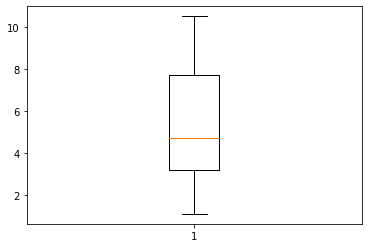

In [10]:
plt.boxplot(data['Y_exp'],data = data)
plt.show()

<AxesSubplot:>

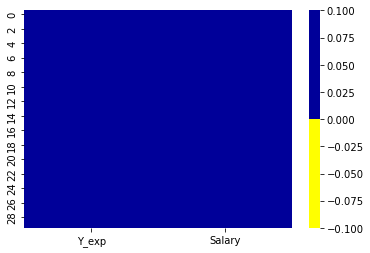

In [11]:
cols = data.columns
colours = ['#ffff00','#000099']
sns.heatmap(data[cols].isnull(),cmap = sns.color_palette(colours))

<AxesSubplot:xlabel='Y_exp', ylabel='Salary'>

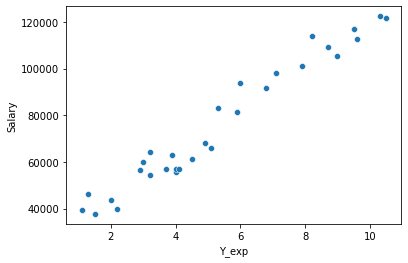

In [12]:
sns.scatterplot(x =data['Y_exp'], y = data['Salary'])

In [13]:
data.corr()

,Y_exp,Salary
Y_exp,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='Y_exp', ylabel='Density'>

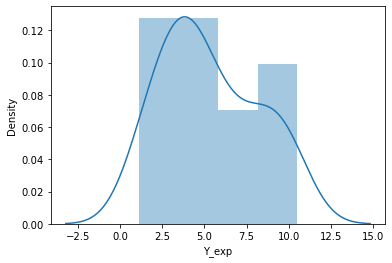

In [14]:
sns.distplot(data['Y_exp'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

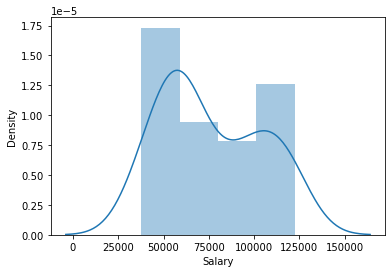

In [15]:
sns.distplot(data['Salary'])

In [16]:
import statsmodels.formula.api as smf
model =smf.ols ('Salary~Y_exp',data =data).fit()

<AxesSubplot:xlabel='Y_exp', ylabel='Salary'>

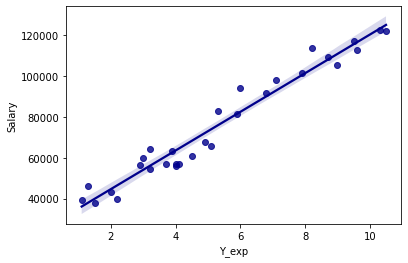

In [17]:
sns.regplot(x ='Y_exp',y = 'Salary',data = data,color = 'darkblue')

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.14e-20
Time:                        12:13:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Y_exp       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.params

Intercept    25792.200199
Y_exp         9449.962321
dtype: float64

In [20]:
model.tvalues

Intercept    11.346940
Y_exp        24.950094
dtype: float64

In [21]:
model.pvalues

Intercept    5.511950e-12
Y_exp        1.143068e-20
dtype: float64

In [22]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [25]:
model.mse_resid

33504591.131015327

In [26]:
np.sqrt(model.mse_resid)

5788.315051119395

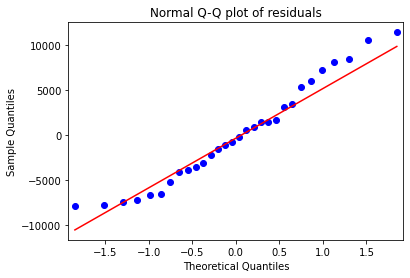

In [29]:
import statsmodels.api as sm
qqplot =sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [30]:
data_pred = pd.DataFrame(data ={'Y_exp':[10,5,2,3]})
data_pred

,Y_exp
0,10
1,5
2,2
3,3


In [31]:
model.predict(data_pred)


0    120291.823413
1     73042.011806
2     44692.124842
3     54142.087163
dtype: float64